# Assignment 1: Uninformed Search

Claire Goldstein



## Overview

Breadth-first and depth-first are two algorithms for performing
uninformed search---a search that does not use
knowledge about the goal of the search.  You will implement both
search algorithms in python and test them on a simple graph.

## Required Code

In this jupyter notebook, you must implement at least the following functions:

  * `breadthFirstSearch(startState, goalState, successorsf)` 
  * `depthFirstSearch(startState, goalState, successorsf)`
  
Each receives as arguments the starting state, the goal state, and a successors function.  `breadthFirstSearch` returns the breadth-first solution path as a list of states starting with the `startState` and ending with the `goalState`.  `depthFirstSearch` returns the depth-first solution path.

The search algorithm has been implemented by the specifications in [03 Problem-Solving Agents](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/03 Problem-Solving Agents.ipynb) lecture notes.

# Example

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [1]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a','h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

In [2]:
successors.get('a',[])

['b', 'c', 'd']

In [3]:
import copy

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [4]:
successorsf('e')

['k', 'l']

# Implementaion of DFS & BFS 


From the  in [03 Problem-Solving Agents](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/03 Problem-Solving Agents.ipynb) Lecture Notes : 

Here is an algorithm definition for both breadth-first and depth-first
search, tailored to fit the python implementation you must complete
for [Assignment 1](http://nbviewer.ipython.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/A1 Uninformed Search.ipynb).  The
algorithm maintains a local variable named `unExpanded` to be a list
of nodes whose children have not yet been generated (like the authors'
`frontier` variable), and a dictionary named `expanded` to keep
the nodes for which we have generated the children (like the authors'
`explored` variable).  In each a node is stored with its parent,
allowing a solution path to be generated be stepping backwards from
the goal node once it is found.

Given the `startState`, `goalState`, `successorsf`, and
`breadthFirst` (a boolean variable):
  * Initialize `expanded` to be an empty dictionary
  * Initialize `unExpanded` to be a list containing the pair `(startState, None)`
  * If `startState` is the `goalState`, return the list containing just `startState`
  * Repeat the following steps while `unExpanded` is not empty:
    * Pop from the end of `unExpanded` a (`state`, `parent`) pair.
    * Generate the `children` of `state` using the `successorsf` function.
    * Add `state: parent` to the `expanded` dictionary
    * For efficiency, remove from `children` any states that are already  in `expanded` or `unExpanded`.
    * If the goal has been found (in python, `goalState` is in `children`):
      * Initialize the solution path with the list `[state, goalState]`. 
      * While `parent` exists:
        * Insert `parent` to the front of the solution path.
        * Set `parent` to the parent of `parent`.
      * Return the solution path.
    * <font color="green">Sort and reverse the list of states in `children`, so that we all find the same solution paths.</font>
    * Create a modified `children` list by changing each entry to be a pair (child, `parent`), where `parent` is the parent of the child.
    * Insert the modified `children` list into the `unExpanded` list at the <font color="blue">front if doing breadth-first search , or at the back if doing depth-first search.</font>  Use the boolean variable `breadthFirst` provided as the last argument in the call to this function to control inserting at the front the back.  <font color="red">Do this insertion with one statement, not a for loop</font>, to preserve the order of the children.
    
  

In [5]:
def Search(startState, goalState, successorsf, BFS):
    ''' Search provides a depth first or breath first search based on the 4rd parameter. 
        The 3rd parameter is the successorsf function as the defintiton of what children each node.
        The 1st and 2nd parameters give us the start and stop of the a graph 
    '''
    
    expanded = {}
    unExpanded =[(startState,None)]
    
    if startState == goalState :
        return [startState]
    
    seen = [startState]
    while len(unExpanded) != 0 :
      
        #Pop from the end of unExpanded a (state, parent) pair.
        state, parent = unExpanded.pop()
        #Generate the children of state using the successorsf function.
        children = successorsf(state)
        #Add state: parent to the expanded dictionary
        expanded.update({state : parent})
        
        #for efficiency, remove from children any states that are already in seen 
        mod=[]
        for child in children : 
            if child not in seen:
                mod.append(child)
                seen.append(child)
        children = mod
        
       
        #If the goal has been found (in python, goalState is in children):
        if goalState in children:
            #Initialize the solution path with the list [state, goalState].
            path = [state, goalState]
            #While parent exists:
            while parent != None:
                #Insert parent to the front of the solution path.
                path.insert(0,parent)
                #Set parent to the parent of parent.
                parent = expanded.get(parent)
            #Return the solution path.
            return path
        
        #Sort and reverse the list of states in children, so that we all find the same solution paths.
        children.sort()
        children.reverse()
        
        
        #Create a modified children list by changing each entry to be a pair (child, parent), 
        #where parent is the parent of the child.
        
        modified=[]
        for child in children:
            modified.append((child,state))
        children=modified
     
        
        if BFS: #children list into the unExpanded list at the front if doing breadth-first search
            unExpanded = children + unExpanded 
                  
        else:# at the back if doing depth-first search
            unExpanded = unExpanded + children
            
                
        #print("unExpanded ",unExpanded)
        #print("expanded ",expanded)
        #print("\n")
        
    if len(unExpanded)== 0:
        return "Goal not found"
       

In [6]:
def depthFirstSearch(startState, goalState, successorsf):
    '''DFS visit nodes of graph depth wise.
        It visits nodes until reach a leaf or a node which doesn’t have non-visited nodes.
        DFS will not always find Optimal solution '''
    return Search(startState, goalState, successorsf, False)



In [7]:
def breadthFirstSearch(startState, goalState, successorsf):    
    ''' BFS visit nodes level by level in Graph 
        Will return the Optimal Path'''    
    return Search(startState, goalState, successorsf, True)
    

Below is the given Tests by Chuck Anderson

In [8]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))

Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']


In [9]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']


Tests by Claire 


In [10]:
successors2 = {'a': ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a','h', 'i'],
              'd':  ['j', 'k'],
              'e':  ['l'],
              'f':  ['m'],
              'g':  ['n','o','p']}
import copy

def successorsf2(state):
    return copy.copy(successors2.get(state, []))

In [11]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf2))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf2))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf2))
print('path from a to o is', breadthFirstSearch('a', 'o', successorsf2))
print('path from a to k is', breadthFirstSearch('a', 'k', successorsf2))

Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'f', 'm']
path from a to z is Goal not found
path from a to o is ['a', 'b', 'g', 'o']
path from a to k is ['a', 'd', 'k']


In [12]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf2))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf2))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf2))
print('path from a to o is', depthFirstSearch('a', 'o', successorsf2))
print('path from a to k is', depthFirstSearch('a', 'k', successorsf2))

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'f', 'm']
path from a to z is Goal not found
path from a to o is ['a', 'b', 'g', 'o']
path from a to k is ['a', 'd', 'k']


Let's try a navigation problem around a grid of size 10 x 10.

Tests By Chuck:

In [35]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:
        for c in [-1, 0, 1]:
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  # cool, huh?
                succs.append( (newr, newc) )
    return succs

In [14]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [15]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [16]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [17]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))

Breadth-first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [18]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


Oooo, what kind of path is that?  Let's plot it.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

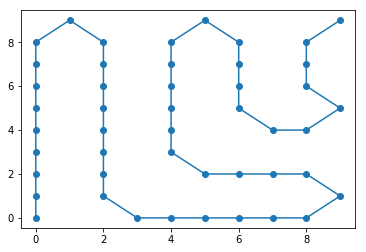

In [21]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [22]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

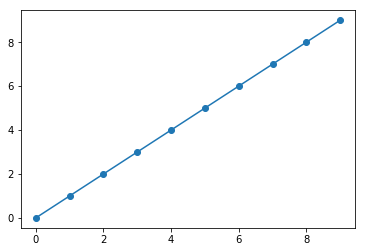

In [23]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [24]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

'Goal not found'

Tests by Claire: 
    

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (7, 9)]


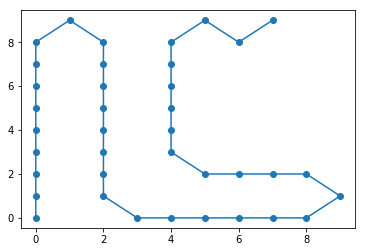

In [25]:
DFS= depthFirstSearch((0, 0), (7, 9), gridSuccessors)
print(DFS)
rowsDFS = [location[0] for location in DFS]
colsDFS = [location[1] for location in DFS]
plt.plot(rowsDFS,colsDFS,'o-');

[(0, 0), (0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9)]


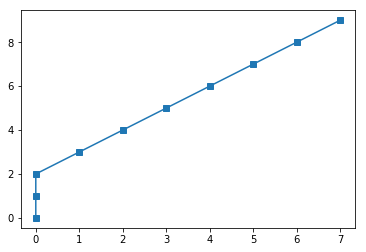

In [26]:
BFS = breadthFirstSearch((0, 0), (7, 9), gridSuccessors)
print(BFS)
rowsBFS = [location[0] for location in BFS]
colsBFS = [location[1] for location in BFS]
plt.plot(rowsBFS,colsBFS,'s-');

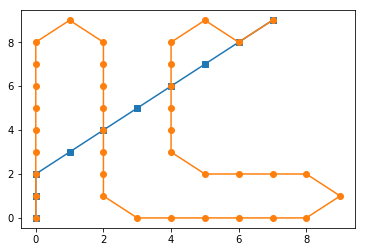

In [27]:
plt.plot(rowsBFS,colsBFS,'s-',rowsDFS,colsDFS,'o-');

# Extra Credit

For extra credit, use your functions to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).
The following code illustrates one possible state representation and shows results of a breadth-first and a dept-first search.  

You must define a new successors function, called `camelSuccessorsf`. 

In [28]:
camelStartState= ('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
camelStartState

('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')

In [29]:
camelGoalState = ('L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R')

In [30]:
import copy

def camelSuccessorsf(camelState):
    right = ()
    left  = ()
    space = camelState.index(' ')
    returnList =[]
    
    #Right:
    #R jumps over L into space 
    if (space - 2) >= 0 and  camelState[space - 1] != camelState[space - 2] and camelState[space - 2] == 'R' : 
        #('R', 'R', 'R', 'L', 'R', 'L', ' ', 'L', 'L')
        li=list(camelState)
        li[space]= 'R'
        li[space - 2]=' '
        right=tuple(li)
        
     # R moves 1 right     
    if (space - 1)>=0 and camelState[space - 1] == 'R' :
        #('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L') - R in position 3 moves into space 
        li=list(camelState)
        li[space]='R'
        li[space-1]=' '
        right=tuple(li) 
  
        
    #Left:
    #L jumps over R into space 
    if  (space +2) <=8 and camelState[space + 1] != camelState[space + 2] and camelState[space + 2] == 'L' : 
        #('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L') 
        li=list(camelState)
        li[space]='L'
        li[space + 2]=' '
        left=tuple(li)
        
    # L moves Left 
    if (space +1)<=8 and camelState[space + 1] == 'L' : 
        #('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L') 
        li=list(camelState)
        li[space]='L'
        li[space+1]=' '
        left=tuple(li)
   
    
    if (len(right) !=0):
        returnList.append(right)
    
    if (len(left) !=0):   
        returnList.append(left)
        
    return returnList



In [31]:
camelSuccessorsf(camelStartState)

[('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L')]

In [32]:
children0 = camelSuccessorsf(camelStartState)

camelSuccessorsf(children0[0])


[('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')]

In [33]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)

dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)
     

Breadth-first solution: ( 25 steps)
('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', 'L', ' ', 'L', 'L')
('R', 'R', 'R', 'L', ' ', 'L', 'R', 'L', 'L')
('R', 'R', ' ', 'L', 'R', 'L', 'R', 'L', 'L')
('R', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', ' ')
('R', 'L', 'R', 'L', 'R', 'L', ' ', 'L', 'R')
('R', 'L', 'R', 'L', ' ', 'L', 'R', 'L', 'R')
('R', 'L', ' ', 'L', 'R', 'L', 'R', 'L', 'R')
(' ', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'R')
('L', 'L', 'R', 'L', 'R', 'L', ' ', 'R', 'R')
('L', 'L', 'R', 'L', ' ', 'L', 'R', 'R', 'R'

## Grading

Your notebook will be run and graded automatically. Download [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A1grader.tar) and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  In markdown cells, explain what your functions are doing and summarize the algorithms.

Add at least one markdown cell that describes problems you encountered in trying to solve this assignment.

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/55296).

Grading will be based on 

  * correct behavior of the required functions, and
  * readability of the notebook.

In [34]:
%run -i A1grader.py



======================= Code Execution =======================

Extracting python code from notebook named 'Goldstein-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.
Searching this graph:
 {'a': ['b'], 'b': ['c', 'd'], 'c': ['e'], 'd': ['f', 'i'], 'e': ['g', 'h', 'i']}

Looking for path from a to b.
  Calling breadthFirstSearch(a, b, successorsf)
      and depthFirstSearch(a, b, successorsf)
10/10 points. Your breadthFirstSearch found correct solution path of ['a', 'b']
10/10 points. Your depthFirstSearch found correct solution path of ['a', 'b']

Looking for path from a to i.
  Calling breadthFirstSearch(a, i, successorsf)
      and depthFirstSearch(a, i, successorsf)
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b', 'c', 'e', 'i']

Looking for non-existant path from a to denver.
  Calling brea

<Figure size 432x288 with 0 Axes>